# Multi-hilos vs Multi-procesos
En este trabajo se busca conocer que funciona de manera más rapida, secuencial, multihilos o multiprocesos 

### Primer definimos nuestras funciones en donde se busca aplicar las distintas formas de ejecución 

Se generan dos funciones, una donde se tienen dos matrices (A y B) y se realiza la multiplicación de ambas matrices. Y la otra función que se crea es donde se crean dichas matrices de forma aleatoria de tamaño nxn y luego las multiplica usando la función anteriormente creada

In [7]:
import numpy as np
import time
import threading
import multiprocessing
from concurrent.futures import ProcessPoolExecutor

# Función que multiplica dos matrices
def multiplicacion_matriz(A, B):
    return np.dot(A, B)

# Tarea de multiplicación de matrices (será llamada por cada hilo/proceso)
def multiplicacion(n):
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)
    multiplicacion_matriz(A, B)

### Se crean funciones para los 3 métodos de ejecución
Primero se crea una función en donde se ejecutará nuestras funciones anteriores de manera secuencial, donde se llama n que es el tamaño de la matriz y repeticiones que será la cantidad de veces que se realizará nuestra función multiplicar, y se toma el tiempo de ello
Después se crea la función "concurrente_hilos" donde realizará nuestra tarea pero ahora con multihilos donde usará la librería multithreads, en la función s e encuentra la estructura para realizarlo de esa forma e igual se toma el tiempo 
Por último, se crea la funcion "concurrente_procesos" donde se realizará la misma tarea, o sea las matrices del mismo tamañano y la misma cantidad de veces, pero ahora con multiprocesos usando la librería multiprocesing e igual se toma el tiempo de ejecución

In [8]:
# Ejecución secuencial
def secuencial(n, repeticiones): ##Ejecutra la multiplicación de matrices de manera secuencial 
    start_time = time.time()
    for _ in range(repeticiones): 
        multiplicacion(n)
    return time.time() - start_time

# Ejecución concurrente usando hilos
def concurrente_hilos(n, repeticiones): ##Ejecutra la multiplicación de matrices de forma concurrente usando hilos
    start_time = time.time()
    threads = []
    for _ in range(repeticiones):
        t = threading.Thread(target=multiplicacion, args=(n,)) ##Crea el hilo para cada multiplicación
        t.start()  #inicia el hijo 
        threads.append(t) #Añade el hilo a la lista para hacer seguimiento 
    
    #Espera que todos los hijos terminen
    for t in threads:
        t.join()
    
    return time.time() - start_time

# Ejecución concurrente usando procesos
def concurrente_procesos(n, repeticiones): ##Ejecuta la multiplicación usando multi procesos
    start_time = time.time()
    procesos = []
    for _ in range(repeticiones):
        p = multiprocessing.Process(target=multiplicacion, args=(n,)) ##Crea el proceso para cada multiplicacion
        p.start() ## Lo inicializa
        procesos.append(p) #Añade el proceso 
    
    for p in procesos:
        p.join()
    
    return time.time() - start_time

### Se ejecuta cada función
Primero se define el tamaño de nuestras matrices y cuantas veces queremos que se repita, posteriormente se ejecutra la multiplicación de matrices para cada método, es decir, de manera secuencial, multiprocesos y multihilos y se imprime la cantidad de timepo que tardó cada uno en ejecutarse

In [16]:
if __name__ == "__main__":
    n = 500  # Dimensiones de las matrices (500x500)
    repeticiones = 10  # Cantidad de veces que se realizará la multiplicación

    # Medir tiempo de ejecución secuencial
    tiempo_secuencial = secuencial(n, repeticiones)
    print(f"Tiempo secuencial: {tiempo_secuencial:.2f} segundos")

    # Medir tiempo de ejecución con hilos
    tiempo_hilos = concurrente_hilos(n, repeticiones)
    print(f"Tiempo con multi-hilos: {tiempo_hilos:.2f} segundos")

    # Medir tiempo de ejecución con procesos
    tiempo_procesos = concurrente_procesos(n, repeticiones)
    print(f"Tiempo con multi-procesos: {tiempo_procesos:.2f} segundos")

Tiempo secuencial: 0.09 segundos
Tiempo con multi-hilos: 0.07 segundos
Tiempo con multi-procesos: 0.36 segundos


Como podemos observar en este caso, con una matriz de 500x500 y realizando la tarea 10 veces que ejecutarlo con multihilos fue la que se ejecutó con mayor rapidez, aunque no con mucha diferencia a la forma secuencial. Lo que si podemos notar es que si hubo una diferencia notaria a comparación a la forma de muli-procesos.

In [23]:
if __name__ == "__main__":
    n2 = 5000  # Dimensiones de las matrices (500x500)
    repeticiones2 = 10  # Cantidad de veces que se realizará la multiplicación

    # Medir tiempo de ejecución secuencial
    tiempo_secuencial2 = secuencial(n2, repeticiones2)
    print(f"Tiempo secuencial: {tiempo_secuencial2:.2f} segundos")

    # Medir tiempo de ejecución con hilos
    tiempo_hilos2 = concurrente_hilos(n2, repeticiones2)
    print(f"Tiempo con multi-hilos: {tiempo_hilos2:.2f} segundos")

    # Medir tiempo de ejecución con procesos
    tiempo_procesos2 = concurrente_procesos(n2, repeticiones2)
    print(f"Tiempo con multi-procesos: {tiempo_procesos2:.2f} segundos")

Tiempo secuencial: 29.18 segundos
Tiempo con multi-hilos: 150.87 segundos
Tiempo con multi-procesos: 0.87 segundos


En este caso podemos observar que el más rápido fue el multiprocesos a comparación de los demás, por ejemplo que con multi-hilos la diferencia es demasiado, pero como se ve es que lo que ocasionó esto fue que se aumentó el tamaño de las matrices

In [24]:
if __name__ == "__main__":
    n3 = 50  # Dimensiones de las matrices (500x500)
    repeticiones3 = 1000  # Cantidad de veces que se realizará la multiplicación

    # Medir tiempo de ejecución secuencial
    tiempo_secuencial3 = secuencial(n3, repeticiones3)
    print(f"Tiempo secuencial: {tiempo_secuencial3:.2f} segundos")

    # Medir tiempo de ejecución con hilos
    tiempo_hilos3 = concurrente_hilos(n3, repeticiones3)
    print(f"Tiempo con multi-hilos: {tiempo_hilos3:.2f} segundos")

    # Medir tiempo de ejecución con procesos
    tiempo_procesos3 = concurrente_procesos(n3, repeticiones3)
    print(f"Tiempo con multi-procesos: {tiempo_procesos3:.2f} segundos")

Tiempo secuencial: 0.12 segundos
Tiempo con multi-hilos: 0.26 segundos
Tiempo con multi-procesos: 127.88 segundos


En este tercer caso podemos observar que el más rápido fue la forma secuencial, teniendo hasta un tiempo mejor que en el primer ejemplo proporcionado y en este caso el de multiprocesos fue el que obtuvo el peor tiempo con bastante diferencia pero como se observa en este caso se redujo el tamaño de la matriz pero se aumentaron las repeticiones logrando ese cambio

# Entonces si realiza lo mismo, por que no siempre se obtiene el mismo método más rápido?

En si, podría parecer que realiza lo mismo ya que en los tres ejemplos se realiza una multiplicación de matrices creadas de forma aleatoria en repettidas ocasiones pero lo que provoca que no siempre salga el mismo método como el más rapido es que se fue modificando el tamaño de las matrices y las veces que se repetían. Se pudo observar que en la forma secuencial fue más rápida cuando la matriz era más pequeña y se realizaron muchas repeticiones pero en ese caso el multi-procesos fue el más tardado. En cambio cuando se aumentó el tamaño de la matriz a 5000 y pocas repeticiones el multiprocesos fue el más rapido y el multi-hilos fue el peor. Y en el primer caso mostrado el multi-hilos fue el mejor aunque con muy poca diferencia al secuencial aunque nuevamente tuvimos al multi-procesos como el peor.

Entonces podemos concluir que el multi-procesos funciona mejor para un matriz más grande pero pocas repeticiones, el secuencial para muchas repeticiones pero con una matriz pequeña y el multi-hilos para una matriz mediana y pocas repeticiones 

Esto se puede observar en la gráfica que se presenta a continuación 

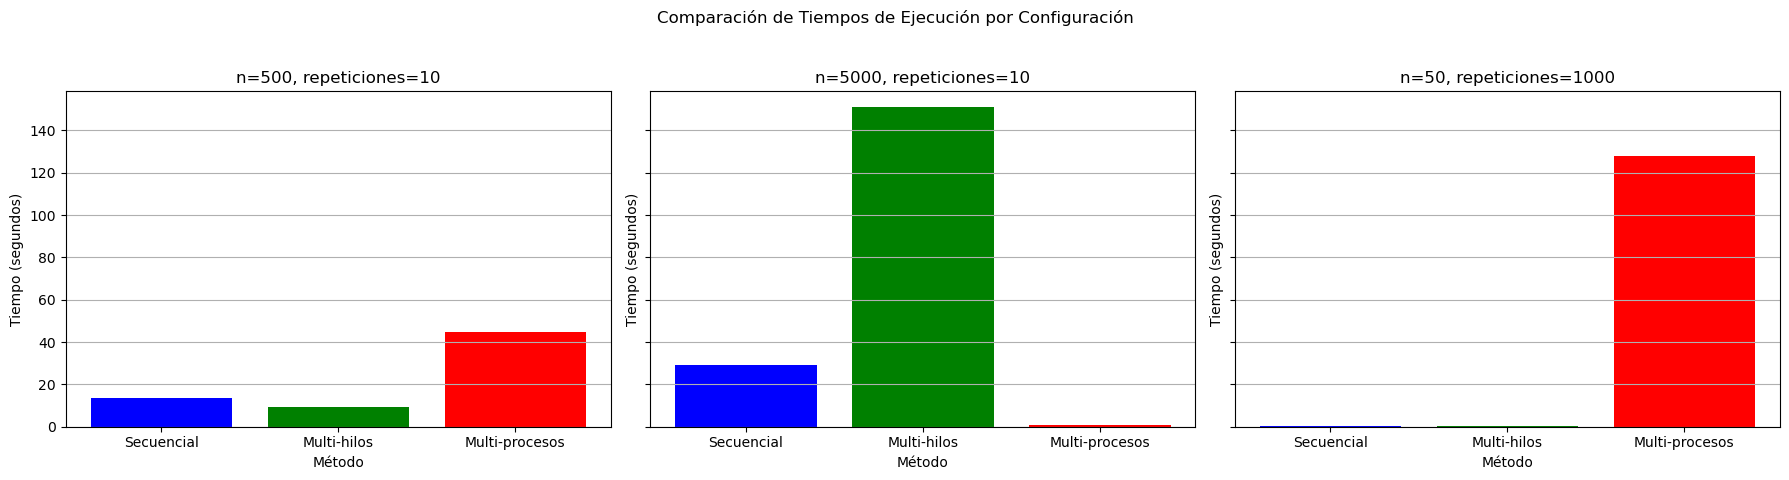

In [34]:
import matplotlib.pyplot as plt

# Simulación de los tiempos para cada escenario (debes reemplazar estos valores con los resultados reales)
tiempos_secuencial = [tiempo_secuencial, tiempo_secuencial2, tiempo_secuencial3]
tiempos_hilos = [tiempo_hilos, tiempo_hilos2, tiempo_hilos3]
tiempos_procesos = [tiempo_procesos, tiempo_procesos2, tiempo_procesos3]

# Valores de 'n' y 'repeticiones' para cada prueba
ns = [500, 5000, 50]  # Por ejemplo, valores de n
repeticiones = [10, 10, 1000]  # Por ejemplo, valores de repeticiones

# Crear una figura y ejes
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Configuraciones de las subgráficas
for i, (n_value, reps) in enumerate(zip(ns, repeticiones)):
    axs[i].bar(['Secuencial', 'Multi-hilos', 'Multi-procesos'], 
                [tiempos_secuencial[i], tiempos_hilos[i], tiempos_procesos[i]], 
                color=['b', 'g', 'r'])
    
    axs[i].set_title(f'n={n_value}, repeticiones={reps}')
    axs[i].set_xlabel('Método')
    axs[i].set_ylabel('Tiempo (segundos)')
    axs[i].grid(axis='y')

# Ajustar el diseño
plt.suptitle('Comparación de Tiempos de Ejecución por Configuración')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Espacio para el título
plt.show()


### Explicación
En el primer caso, el enfoque multi-hilos resultó ser más rápido ya que al usarse numpy, ya está usando bibliotecas optimizadas logrando liberal el GIL y como la matriz no es grande no hay suficiente carga de trabajo para causar un efecto negativo por la concurrencia. Los hilos logran aprovechar algo de paralelismo para ejecutrar las multiplicaciones de manera concurrente. En cambio para multi-procesos, la creación de multiprocesos tiene una sobrecarga considerable en comparación a la creación de hijos, ya que cada procesos tiene su propio espacio de memoria. Entonces este tipo de matriz no genera suficiente carga de trabajo para tener la necesidad de crear multi-procesos

En el segundo caso, el multi-procesos es mucho más eficiente ya que como sabemos cada proceso tiene su espacio de memorio y puede ejecutarse en nucluos separados de la CPU, logra un paralelismo. EN este caso las operaciones de multiplicar matrices se distribuyen entre los núcleos disponibles haciendo que se reduzca el tiempo total de ejecución aunque igual hay una sobrecarga de crear procesos. En cambio para multi-hijos el tiemp aumenta drásticamente ya que al ser una tarea intensiva para la CPU debido al GIL ya que el tamaño de las matrices son lo suficientemente grande para que el GIL limite el rendimiento. Además, la coordinación de los hilos añade sobrecarga, lo que resulta en un tiempo de ejecución mucho mayor que en el enfoque secuencial.

En el tercer caso, la forma secuencial fue la más rápida ya que no se tiene una sobrecarga en la creación de matrices muy grandes entonces la tarea de multiplicar matrices de 50x50 es relativamente pequeña por eso se logra ejecutrar de manera más rápida y que no se presentan bloquos signigicativos. En cambio para multiprocesos para esta caso implica una sobrecarga por la creación de los procesos, además realizar múltiples multiplicaciones de matrices se requiere que se compartan datos entre los procesos entonces el tiempo de comunicación y la sincornización de procesos pueden ser significativos, a parte, en este tipo de tareas pequeñas la sobrecarga de iniciar procesos puede ser mayor a los beneficios que se pudieran obtener.

Entonces podemos decir que para tareas pequeñas o no tan intensas, un enfoque secuecial o multihilos es suficiente mientras que tarea muy intensas en el CPU podemos observar que la creación de multiprocesos es más eficiente, ya que el aprovechar los núcleos del CPU reduce el tiempo de ejecución

## Entonces, cuál es mejor? 
Como tal no podemos concluir cual es mejor ya que en distintos casos uno diferente resultaba más rápido, aunque en la gráfica que se muestra en la parte de abajo podemos observar que la ejecución de manera secuencial se mantiene constante, o sea, no siempre fue la más rápida pero el tiempo que tardaba no eran mucha la diferencia a comparación del más rápido a comparación de las otras dos formas que en ocasiones servían muy rápido pero en otras su tiempo de ejecución era bastante atípico

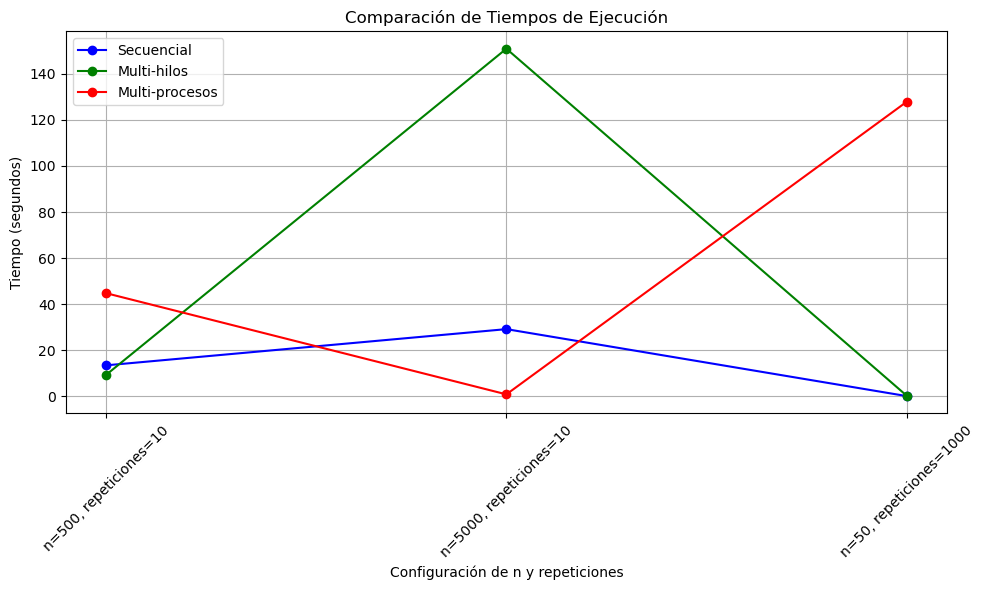

In [33]:
import matplotlib.pyplot as plt

# Simulación de los tiempos para cada escenario (estos deben ser tus resultados reales)
tiempos_secuencial = [tiempo_secuencial, tiempo_secuencial2, tiempo_secuencial3]
tiempos_hilos = [tiempo_hilos, tiempo_hilos2, tiempo_hilos3]
tiempos_procesos = [tiempo_procesos, tiempo_procesos2, tiempo_procesos3]

# Valores de 'n' y 'repeticiones' para cada prueba
ns = [500, 5000, 50]  # Por ejemplo, valores de n
repeticiones = [10, 10, 1000]  # Por ejemplo, valores de repeticiones

# Etiquetas para las gráficas
labels = [f"n={n}, repeticiones={reps}" for n, reps in zip(ns, repeticiones)]

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Gráfica de tiempo secuencial
plt.plot(labels, tiempos_secuencial, label='Secuencial', marker='o', color='b')

# Gráfica de tiempo multi-hilos
plt.plot(labels, tiempos_hilos, label='Multi-hilos', marker='o', color='g')

# Gráfica de tiempo multi-procesos
plt.plot(labels, tiempos_procesos, label='Multi-procesos', marker='o', color='r')

# Configuraciones de la gráfica
plt.title('Comparación de Tiempos de Ejecución')
plt.xlabel('Configuración de n y repeticiones')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.tight_layout()  # Acomodar automáticamente los elementos para que no se sobrepongan
plt.show()


### Conclusión
Como en este caso y en otros casos no siempre se obtendrá la misma manera de ejecución más rápida ya que va cambiando por distintos factores, como la complejidad para formar hilos o procesos, la complejidad del algoritmo, que tipo de tarea se está pidiendo, cuantos nucleos se tengan, hasta por la computadora que se tenga, son facotres que modifican el tiempo y que hacen que la forma de ejecución más rápida vaya cambiando 

Entonces la elección entre los 3 se debe en medida al tamaño de la tarea, para operaciones pequeñas, suele ser más eficiente el enfoque secuencial, junto con multihilos, mientras que el multi-procesos para tareas más grandes y pesadas